In [153]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [154]:
# 1. Problem (case study)
#      · Data Description.
#          - We have a database of Marketing Customer Analisis
#      · Goal.
#          - The goal is to understand customer demographics and buying behavior
#          - We will take targeted actions to increase profitable customer response, retention, and growth.

In [155]:
# 2. Getting Data
#       · Read the .csv file.
marketing_df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
m_df = marketing_df.copy()

In [156]:
# 3. Cleaning/Wrangling/EDA
#       · Change headers names.
# cols = []
# for column in m_df.columns:
#     cols.append(column.lower())
# m_df.columns = cols
m_df = m_df.rename(columns={'Total Claim Amount': 'claim'})

In [157]:
#       · Deal with NaN values. (they are clean already)
# nulls_df = pd.DataFrame(round(m_df.isna().sum()/len(m_df),4)*100)
# nulls_df = nulls_df.reset_index()
# nulls_df.columns = ['header_name', 'percent_nulls']
#m_df.isna().sum()

In [158]:
#       · Categorical Features.
categorical = m_df.select_dtypes(include=[object])
categorical.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [159]:
#       · Numerical Features.
numerical = m_df.select_dtypes(include=[np.number])
numerical.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'claim'],
      dtype='object')

In [160]:
#       · Exploration.

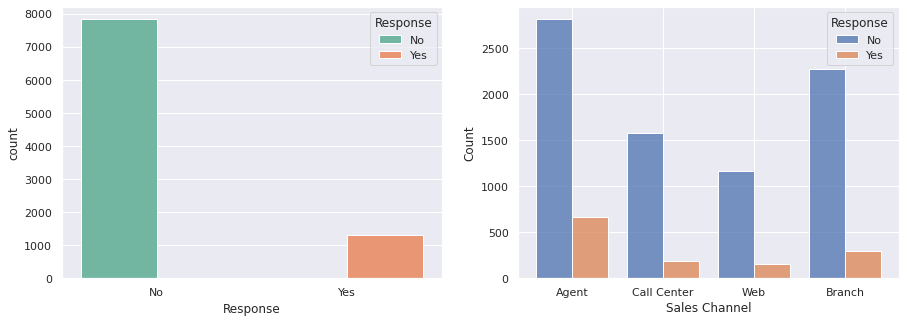

In [161]:
# #Number of responses
fig, ax = plt.subplots(1,2)
fig.set_figwidth(15)
fig.set_figheight(5)
sns.countplot(x="Response", data=marketing_df, hue="Response", palette="Set2",ax = ax[0])
g = sns.histplot(data=marketing_df, x='Sales Channel', hue='Response', multiple='dodge', shrink=.8,ax = ax[1])

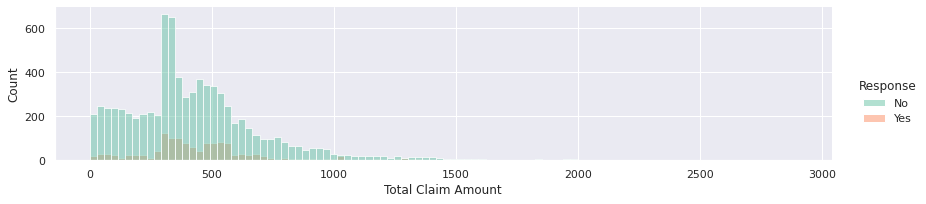

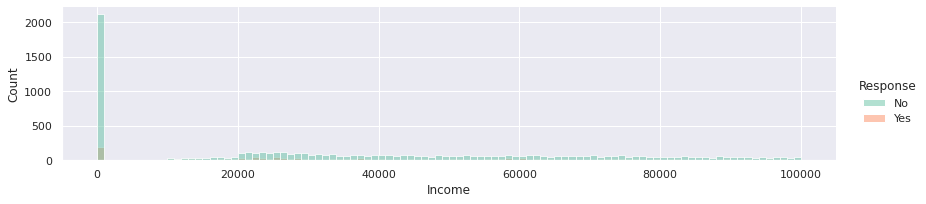

In [162]:
# Response rate by claim and Income
sns.displot(x='Total Claim Amount', hue = 'Response', data = marketing_df, bins = 100, palette="Set2",height=3,aspect=4)
sns.displot(x='Income', hue = 'Response', data = marketing_df, bins = 100, palette="Set2",height=3,aspect=4)

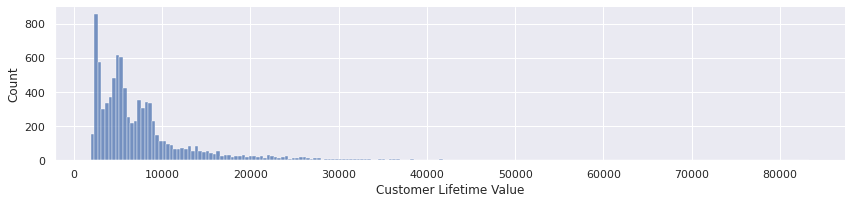

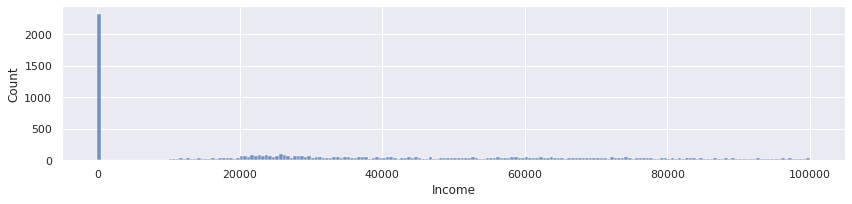

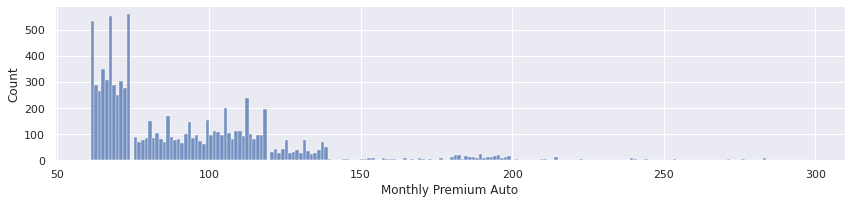

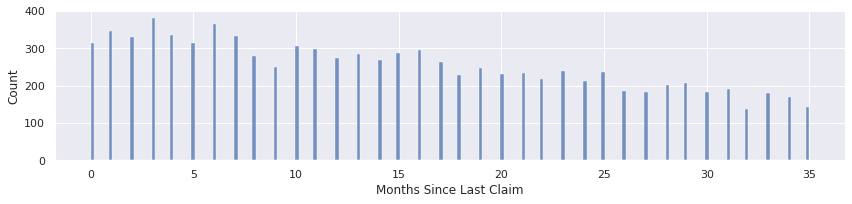

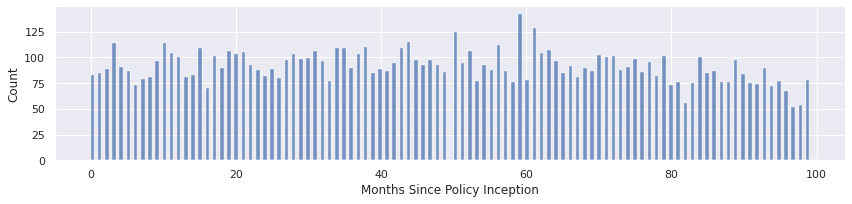

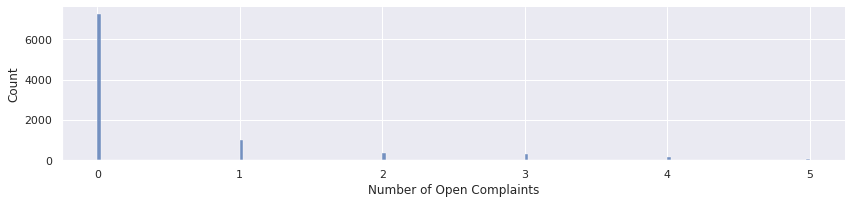

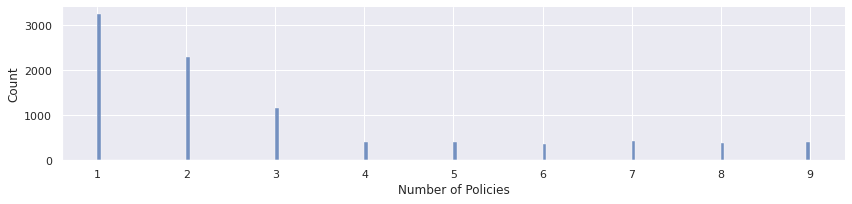

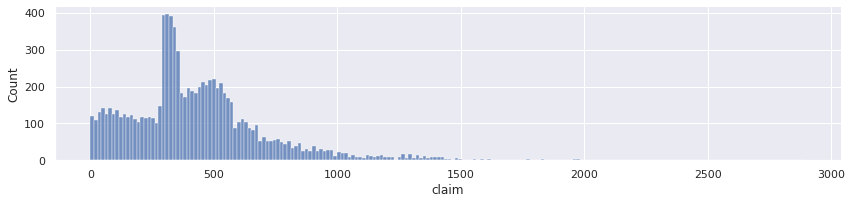

In [163]:
# We check the distributions
for column in numerical.columns:
    sns.displot(x=column, data = numerical, bins = 200, palette="Set1",height=3,aspect=4)
plt.show()
# - customer lifetime value and total claim ammount could be reinterpreted with log in order to fit a notmal dist
# - we could also get rid of 0 income in order to get some value from that data

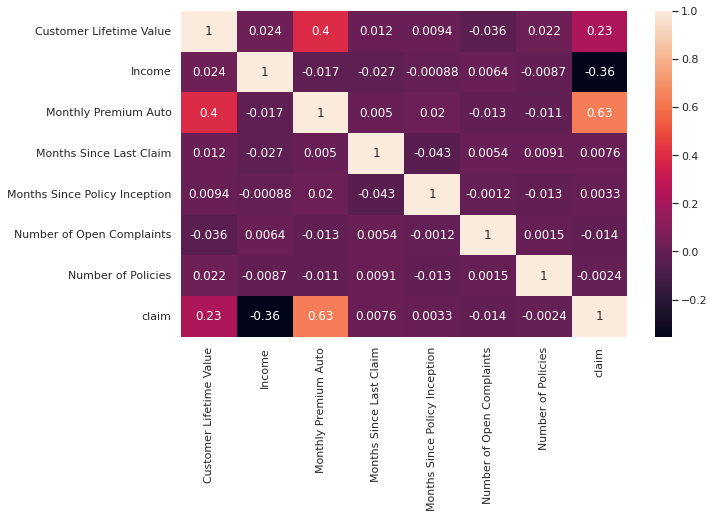

In [164]:
# We show the heatmap in order to see correlations
sns.set(rc={'figure.figsize':(10,6)})
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()
# As we can see there are no direct correlation (higher than 0.9) between features

In [165]:
# 4. Processing Data
m_df = m_df.drop(['Customer','Effective To Date'], axis = 1)

shape before:  (9134, 23)
shape after:  (8665, 23)


<AxesSubplot:>

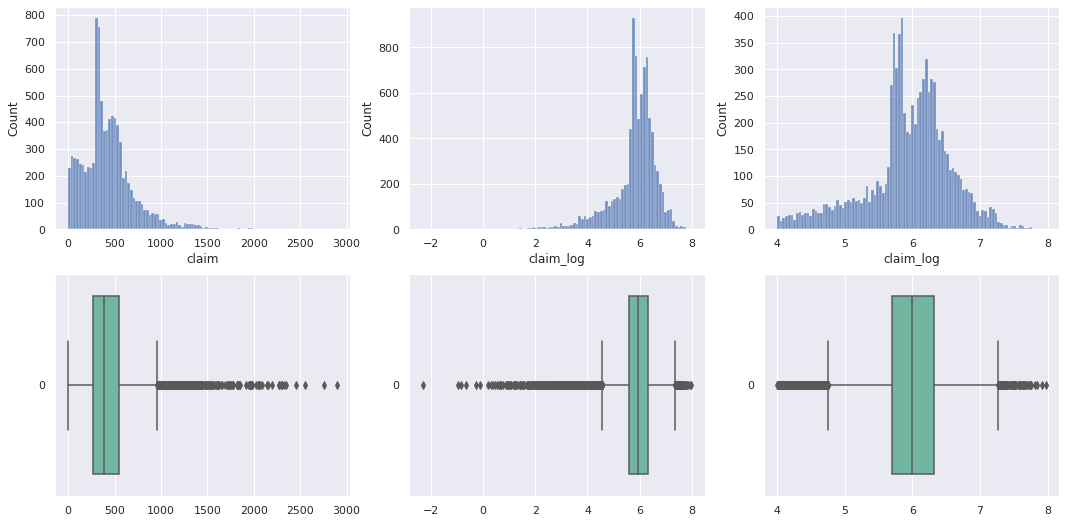

In [166]:
#       · Dealing with outliers.
# As we can see in this graph, the data is positivele skewed for Y
# Therefore, we have to transform the y value
claim_log = np.log(m_df.claim)
m_df['claim_log'] = claim_log

# I will get rid of the values below 7.5 and above 4.5  later on when we get 
print("shape before: ", m_df.shape)
m_df_clean = m_df[m_df['claim_log']>4]
m_df_clean = m_df_clean[m_df_clean['claim_log']<8]
print("shape after: ", m_df_clean.shape)

# Now we can see that the data looks more 'normalized'
sns.set(rc={'figure.figsize':(18,9)})
fig, ax = plt.subplots(2,3)
sns.histplot(x='claim', data = m_df, bins = 100, ax = ax[0,0])
sns.boxplot(data=m_df.claim, orient="h", palette="Set2", ax = ax[1,0])
sns.histplot(x='claim_log', data = m_df, bins = 100, ax = ax[0,1])
sns.boxplot(data=m_df.claim_log, orient="h", palette="Set2", ax = ax[1,1])
sns.histplot(x='claim_log', data = m_df_clean, bins = 100, ax = ax[0,2])
sns.boxplot(data=m_df_clean.claim_log, orient="h", palette="Set2", ax = ax[1,2])

shape before:  (8665, 24)
shape after:  (8421, 24)


<AxesSubplot:>

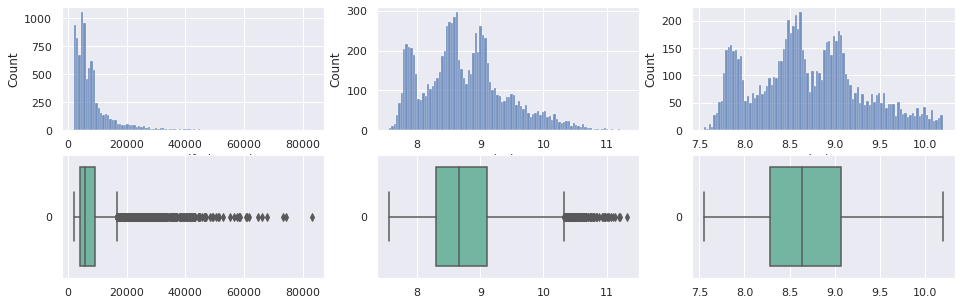

In [167]:
# Same with customer lifetime value:
clv_log = np.log(m_df_clean[['Customer Lifetime Value']])
m_df_clean['clv_log'] = clv_log
sns.set(rc={'figure.figsize':(16,5)})

# I will get rid of the values below above 10.4
print("shape before: ", m_df_clean.shape)
m_df_clean2 = m_df_clean[m_df_clean['clv_log']<10.2]
print("shape after: ", m_df_clean2.shape)

fig, ax = plt.subplots(2,3)
sns.histplot(x='Customer Lifetime Value', data = m_df_clean, bins = 100, ax = ax[0,0])
sns.boxplot(data=m_df_clean['Customer Lifetime Value'], orient="h", palette="Set2", ax = ax[1,0])
sns.histplot(x='clv_log', data = m_df_clean, bins = 100, ax = ax[0,1])
sns.boxplot(data=m_df_clean.clv_log, orient="h", palette="Set2", ax = ax[1,1])
sns.histplot(x='clv_log', data = m_df_clean2, bins = 100, ax = ax[0,2])
sns.boxplot(data=m_df_clean2.clv_log, orient="h", palette="Set2", ax = ax[1,2])

<ipython-input-168-222cf569d764>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_df_clean2['mpa_scal'] = mpa_scal
/home/jzar/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

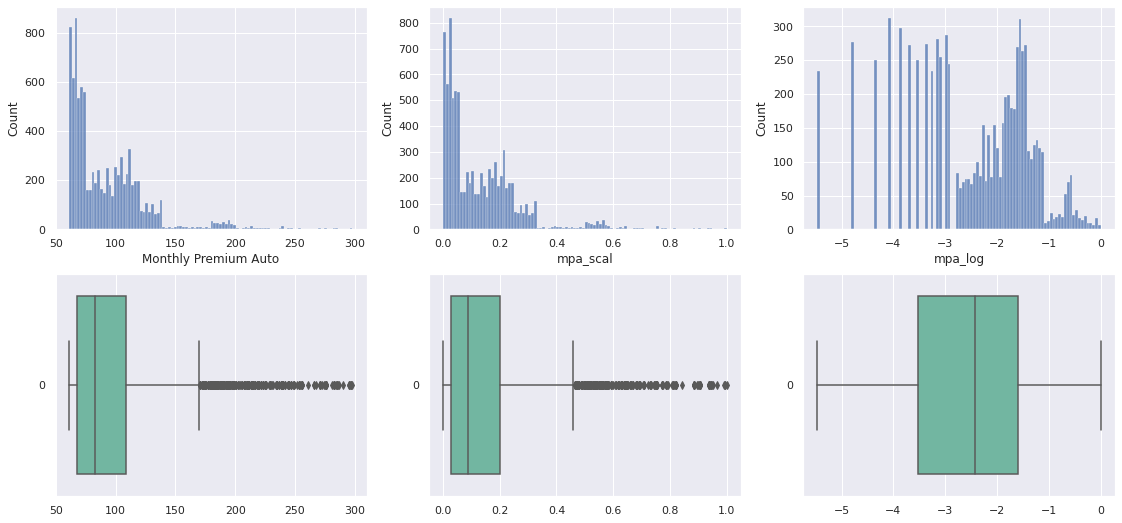

In [168]:
# With monthly premium auto, we apply a transformation power trans:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler().fit(m_df_clean2[['Monthly Premium Auto']])
mpa_scal = scaler.transform(m_df_clean2[['Monthly Premium Auto']])
m_df_clean2['mpa_scal'] = mpa_scal

m_df_clean3 = m_df_clean2.copy()
mpa_log = np.log(m_df_clean3.mpa_scal)
m_df_clean3['mpa_log'] = mpa_log

# I will get rid of the values below above 10.4
# print("shape before: ", m_df_clean2.shape)
# m_df_clean3 = m_df_clean3[m_df_clean3['mpa_scal']>0]
# print("shape after: ", m_df_clean3.shape)
# m_df_clean3.reset_index(drop=True, inplace=True)

sns.set(rc={'figure.figsize':(19,9)})
fig, ax = plt.subplots(2,3)
sns.histplot(x='Monthly Premium Auto', data = m_df, bins = 100, ax = ax[0,0])
sns.boxplot(data=m_df['Monthly Premium Auto'], orient="h", palette="Set2", ax = ax[1,0])
sns.histplot(x='mpa_scal', data = m_df_clean3, bins = 100, ax = ax[0,1])
sns.boxplot(data=m_df_clean3.mpa_scal, orient="h", palette="Set2", ax = ax[1,1])
sns.histplot(x='mpa_log', data = m_df_clean3, bins = 100, ax = ax[0,2])
sns.boxplot(data=m_df_clean3.mpa_log, orient="h", palette="Set2", ax = ax[1,2])

<AxesSubplot:>

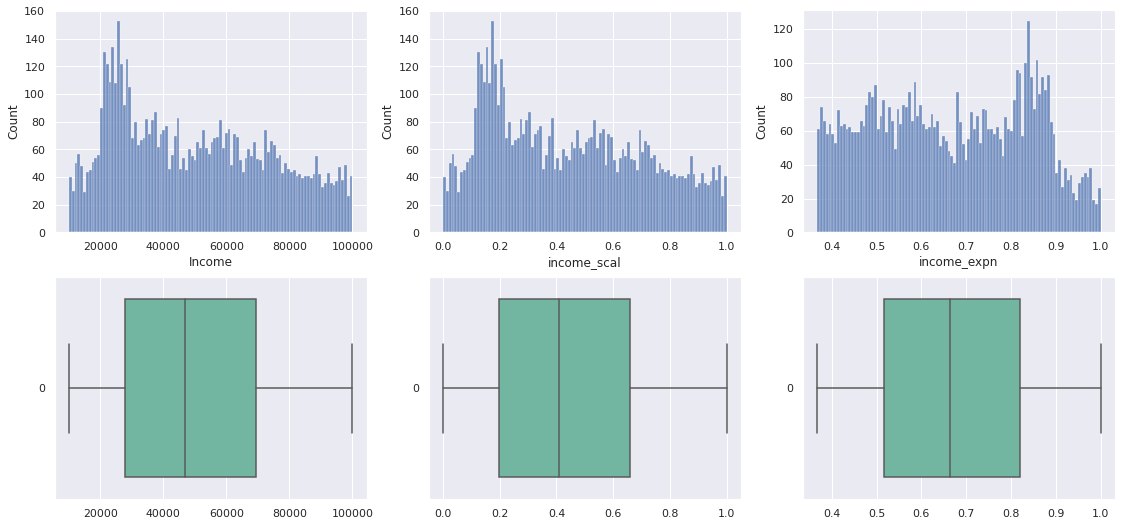

In [169]:
# THIS PART IS NOT NEEDED AS THE CORRELATION RESULT IS WAY BETTER WITHOUT IT
# I will get rid of the value income = 0 
m_df_clean3 = m_df_clean3[m_df_clean3['Income']!=0]

# Lets see how scaler transform works with neg exponential:
scaler = preprocessing.MinMaxScaler().fit(m_df_clean3[['Income']])
income_scal = scaler.transform(m_df_clean3[['Income']])
m_df_clean3['income_scal'] = income_scal

income_expn = np.exp(-m_df_clean3.income_scal)
m_df_clean3['income_expn'] = income_expn

fig, ax = plt.subplots(2,3)
sns.histplot(x='Income', data = m_df_clean3, bins = 100, ax = ax[0,0])
sns.boxplot(data=m_df_clean3.Income, orient="h", palette="Set2", ax = ax[1,0])
sns.histplot(x='income_scal', data = m_df_clean3, bins = 100, ax = ax[0,1])
sns.boxplot(data=m_df_clean3.income_scal, orient="h", palette="Set2", ax = ax[1,1])
sns.histplot(x='income_expn', data = m_df_clean3, bins = 100, ax = ax[0,2])
sns.boxplot(data=m_df_clean3.income_expn, orient="h", palette="Set2", ax = ax[1,2])

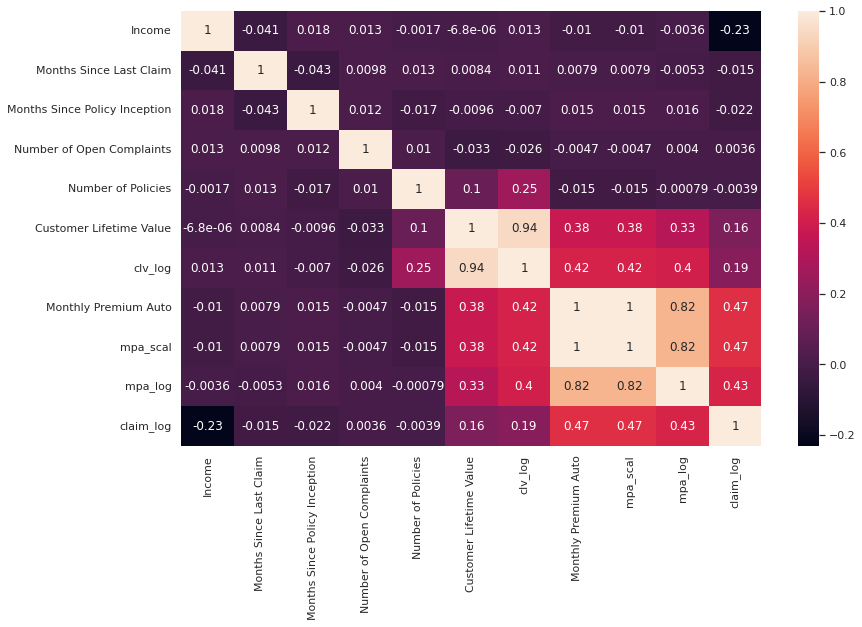

In [170]:
# We show the heatmap in order to see correlations and how good are our transformations...
numerical = m_df_clean3.select_dtypes(include=[np.number])
numerical = numerical.reindex(columns=[ 'Income','Months Since Last Claim', 'Months Since Policy Inception','Number of Open Complaints', 'Number of Policies','Customer Lifetime Value', 'clv_log', 'Monthly Premium Auto', 'mpa_scal','mpa_log', 'claim_log'])
numerical.drop(['Monthly Premium Auto'], axis = 1)
sns.set(rc={'figure.figsize':(13,8)})
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [171]:
# From the results we can see that the only useful value was clv_log, mpa_log is even worse

In [172]:
# And we get rid of the unsused columns and reindex all
m_df_clean4 = m_df_clean3.copy()
# m_df_clean3 = m_df_clean3.drop(['Monthly Premium Auto'], axis = 1)
m_df_clean4 = m_df_clean4.drop(['mpa_scal'], axis = 1)
m_df_clean4 = m_df_clean4.drop(['mpa_log'], axis = 1)
m_df_clean4 = m_df_clean4.drop(['Customer Lifetime Value'], axis = 1)
# m_df_clean3 = m_df_clean3.drop(['Income'], axis = 1)
m_df_clean4 = m_df_clean4.drop(['claim'], axis = 1)
m_df_clean4.reset_index(drop=True, inplace=True)

In [173]:
#       · X-Y Split
X = m_df_clean4.drop(['claim_log'], axis = 1)
y = m_df_clean4[['claim_log']]

In [174]:
numerical_X = X.select_dtypes(include=[np.number])
categorical_X = X.select_dtypes(include=[object])

In [175]:
#       · Normalization for numerical X
from sklearn.preprocessing import StandardScaler
standard_X = StandardScaler().fit(numerical_X).transform(numerical_X)
numerical_X_stand = pd.DataFrame(standard_X,columns=numerical_X.columns)

In [176]:
#       · Encoding Categorical Data.
# We change names by data for some features (the ones that can be ordered)
cat = categorical_X.copy()
cat = cat[['Education','Coverage','Response']]
mapping = {'No':0,'Yes':1}
cat = cat.replace({'Response': mapping})
mapping = {'Basic':0,'Extended':1,'Premium':2}
cat = cat.replace({'Coverage': mapping})
mapping = {'High School or Below':0,'College':1,'Bachelor':2,'Master':3,'Doctor':4}
cat = cat.replace({'Education': mapping})

# # We apply a normalizer for cat
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(cat)
normalized = transformer.transform(cat)
cat_norm = pd.DataFrame(normalized, columns = cat.columns)


# We define the function that we will use in OneHotColum
def oneHotColumn(col_transform):
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(col_transform)
    onehotlabels = enc.transform(col_transform).toarray()
    return pd.DataFrame(onehotlabels,columns = enc.categories_)

# We apply OneHotColum to the other features of the frame
cat2 = categorical_X.copy()
cat2.drop(cat.columns, axis = 1, inplace = True)
concat_categorical = pd.DataFrame()# categorical[['Customer']]
for col in cat2.columns:
      df_from_column = oneHotColumn(cat2[[col]])
      concat_categorical = pd.concat([concat_categorical,df_from_column], axis=1)#
    
    
# I add this for rows in order to get rid of the warning , it returns the properly column string names instead of tupples
# ------- warning code -----------------------
new_columns = []
for column in concat_categorical.columns:
    new_columns.append(column[0])
concat_categorical.columns = new_columns
# ------- warning code -----------------------

cat2 = concat_categorical

categorical_encoded = pd.concat([cat_norm,cat2], axis=1) 

In [177]:
# First we get back X all together:
X_tot = pd.concat([categorical_encoded,numerical_X_stand], axis=1) 

In [178]:
#       · Splitting into train set and test set.
X_train, X_test, y_train, y_test = train_test_split(X_tot, y, test_size=0.33, random_state=100)

In [179]:
# 5. Modeling
#       · Apply model.
reg = LinearRegression().fit(X_train, y_train)

In [180]:
# 6. Model Validation
#       · R2.
#       · MSE.
#       · RMSE.
#       · MAE.
y_pred = reg.predict(X_test)
y_true = y_test
print("The R2 is: ",r2_score(y_true, y_pred))
print("The MSE is: ",mean_squared_error(y_true, y_pred, squared=True))
print("The RMSE is: ",mean_squared_error(y_true, y_pred, squared=False))
print("The MAE is: ",mean_absolute_error(y_true, y_pred))

The R2 is:  0.8445601834505427
The MSE is:  0.06299698293653398
The RMSE is:  0.2509919977539802
The MAE is:  0.18305822104708097


In [182]:
# We can draw the regressions to see this correlation
def resultsDrawer(selector):
    pos = np.where(X_tot.columns == selector)[0]
    r_coef = reg.coef_[0][pos[0]]
    regression_line = reg.intercept_ + r_coef*m_df_clean3[selector]
    # plt.plot(m_df_clean3['clv_log'], regression_line, c = 'orange')
    # plt.scatter(m_df_clean3['clv_log'], m_df_clean3['claim'], c = 'blue' )
    plt.scatter(X_test[selector], y_test, color="black")
    plt.scatter(X_test[selector], y_pred, color="blue", linewidth=3)
    plt.show()

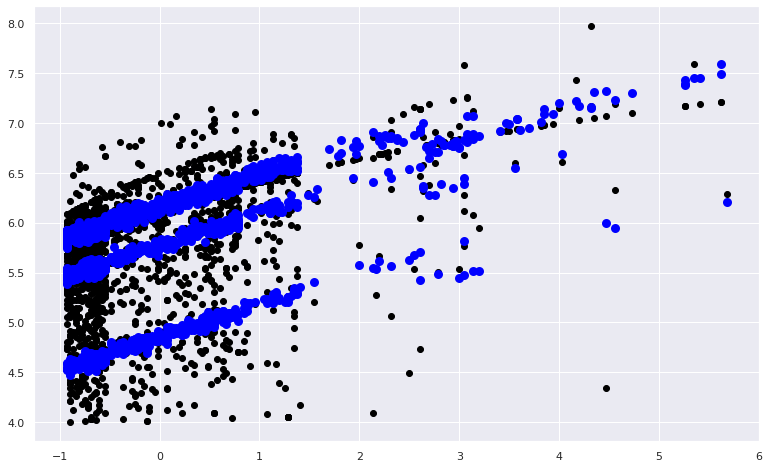

In [183]:
resultsDrawer('Monthly Premium Auto')

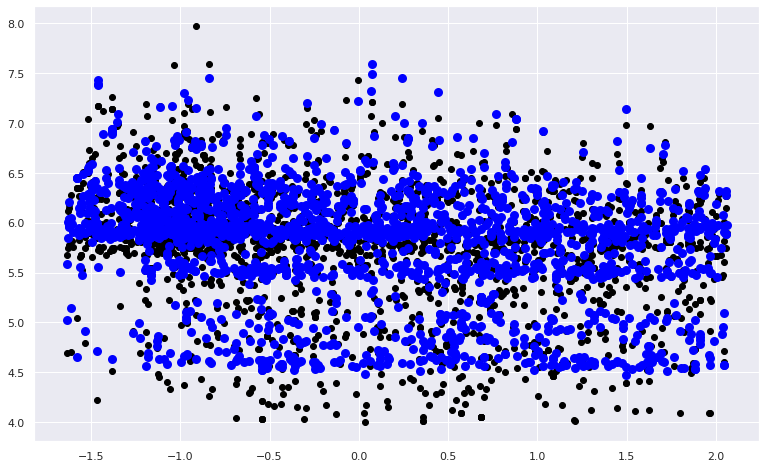

In [184]:
resultsDrawer('Income')

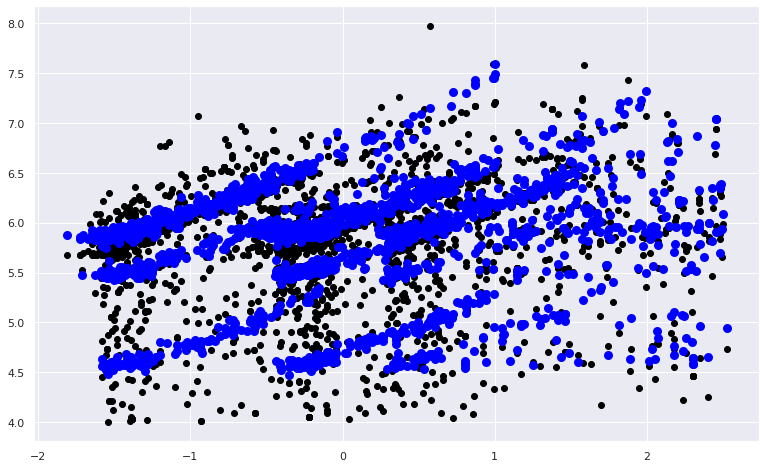

In [185]:
resultsDrawer('clv_log')

In [189]:
# 7. Reporting
#       · Present results.

In [193]:
# We want to see the correlation for the numerical:
tot = pd.concat([numerical_X_stand,y], axis=1) 
sns.set(rc={'figure.figsize':(20,20)})
tot[tot.columns[0:]].corr()['claim_log'][:-1]

Income                          -0.230762
Monthly Premium Auto             0.466105
Months Since Last Claim         -0.015385
Months Since Policy Inception   -0.021561
Number of Open Complaints        0.003628
Number of Policies              -0.003870
clv_log                          0.189528
income_scal                     -0.230762
income_expn                      0.237784
Name: claim_log, dtype: float64

In [187]:
# We want to see the correlation for the categories:
tot = pd.concat([categorical_encoded,y], axis=1) 
sns.set(rc={'figure.figsize':(20,20)})
tot[tot.columns[0:]].corr()['claim_log'][:-1]

Education        -0.157006
Coverage          0.230581
Response          0.090474
Arizona          -0.001004
California       -0.000118
Nevada           -0.006205
Oregon            0.006559
Washington       -0.002362
Disabled          0.107897
Employed         -0.193788
Medical Leave     0.095522
Retired           0.113552
F                -0.037256
M                 0.037256
Rural            -0.757700
Suburban          0.661240
Urban            -0.066542
Divorced          0.023866
Married          -0.047806
Single            0.036670
Corporate Auto   -0.010371
Personal Auto     0.010119
Special Auto     -0.000811
Corporate L1      0.000568
Corporate L2     -0.005899
Corporate L3     -0.009244
Personal L1       0.025487
Personal L2      -0.009142
Personal L3      -0.000898
Special L1        0.012543
Special L2       -0.003270
Special L3       -0.006628
Offer1            0.050699
Offer2           -0.018827
Offer3           -0.029747
Offer4           -0.014436
Agent             0.002764
B

In [ ]:
#  --------------------- We can draw these conclusions ------------------------------
# For the numerical features:

# Income the lower the better (not intuitive?)
# Monthly Premium Auto the higher the better
# Customer Lifetime Value the higher the better

# For categorical features:

# The state is not important, 
# Always with coverage Premium higher better
# Education: the lower the better
# Response: Positive response better
# EmploymentStatus: go for retired
# Gender: Male is the option
# For Location: Suburban wins
# Marrial: go for single but not a big impact
# Policy: Personal L1, then Special L1 (but not a big difference)
# Renew offer type: go for the 1
# Sales channel: Agent or branch better than callcenter
# Vehicle class: As we can see SUV, Luxury Car and Luxury SUV have the highest correlations
# The size: better medsize or small